# MNIST Binary Softmax Test

In [1]:
import numpy
import sys
from binary_helpers import binary
sys.path.append('..')
from helpers.tf_qsoftmax import qsoftmax

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

### Adapt the model to binary code
As this is MSE, we treat the binary code as a "quasiorthonormal basis" in our code and apply `qsoftmax`. Binaries is an array of binary encoded vectors representing categories 0 thru 9.

In [3]:
binaries=numpy.stack([binary(4)(i) for i in range(0,10)]).astype(numpy.float32)

In [4]:
binary_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(4),
  tf.keras.layers.Lambda(qsoftmax(binaries))

])

In [5]:
binary_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [6]:
binary_model.fit(x_train, y_train,  epochs=20,validation_data=(x_test, y_test), verbose=0)

## We display some results
### The validation loss tells us how well the training went

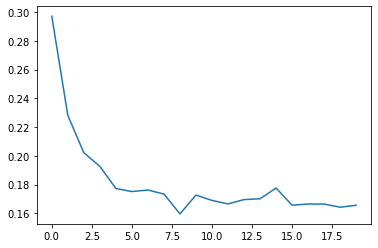

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Markdown

plt.plot(binary_model.history.history['val_loss'])

## Print the final results in big bold text

In [8]:
text = "The accuracy is {:4.3f}% for the test set and {:4.3f}% for the training set".format(
    binary_model.history.history['val_accuracy'][-1]*100,
    binary_model.history.history['accuracy'][-1]*100)
display(Markdown(f"# {text}"))

# The accuracy is 96.140% for the test set and 96.320% for the training set

In [9]:
text

'The accuracy is 96.140% for the test set and 96.320% for the training set'